<center>

#<b>CS353 ML Lab 6</b>

## Name: K V Sumanth Reddy
## Roll No: 181CO225
### Batch: Section 2
### Date: 16/03/2021
---
###Q: Build a KNN model to predict whether a person will be a defaulter or not in a credit scoring system.
---
####<b>Dataset Used:</b> Credit Scoring Dataset (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)
</center>

##<b>Importing Libraries and Dataset</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix,explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report


In [2]:
dataset = pd.read_csv('data.csv')
dataset = dataset[1:]
#printing 5 sample tuples
dataset.sample(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
9213,9213,80000,1,2,1,34,1,2,2,0,0,0,64575,65961,64308,65047,66504,74360,3000,0,2400,2500,9000,0,0
28545,28545,170000,2,2,1,35,0,0,0,0,0,0,96565,62524,88390,63470,55890,51650,30580,50000,24517,14243,7852,4835,0
1474,1474,230000,1,2,2,39,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,652,326,326,326,326,326,0
28339,28339,80000,2,3,1,40,0,0,0,0,0,0,18608,19583,19098,14269,14612,16945,2000,2000,1090,2300,4500,1050,0
1138,1138,50000,1,2,1,41,0,0,0,0,0,0,19339,20424,20086,18600,19153,19289,1703,1306,810,1000,900,900,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  object
 1   X1          30000 non-null  object
 2   X2          30000 non-null  object
 3   X3          30000 non-null  object
 4   X4          30000 non-null  object
 5   X5          30000 non-null  object
 6   X6          30000 non-null  object
 7   X7          30000 non-null  object
 8   X8          30000 non-null  object
 9   X9          30000 non-null  object
 10  X10         30000 non-null  object
 11  X11         30000 non-null  object
 12  X12         30000 non-null  object
 13  X13         30000 non-null  object
 14  X14         30000 non-null  object
 15  X15         30000 non-null  object
 16  X16         30000 non-null  object
 17  X17         30000 non-null  object
 18  X18         30000 non-null  object
 19  X19         30000 non-null  object
 20  X20   

##<b>Data Preprocessing</b>

In [4]:
y = dataset.Y
x = dataset.drop(['Y'], axis = 1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

print('Training dataset size:\nx_train -', len(x_train), '\ny_train -', len(y_train), '\n')
print('Testing dataset size:\nx_test -', len(x_test), '\ny_test -', len(y_test))

Training dataset size:
x_train - 22500 
y_train - 22500 

Testing dataset size:
x_test - 7500 
y_test - 7500


##<b>Training the KNN Model</b>

In [6]:
KNN = []
for i in range(1,21):
  KNNModel = KNeighborsClassifier(n_neighbors = i)
  KNN.append(KNNModel)

In [7]:
for i in range(20):
  KNN[i].fit(x_train, y_train) 

##<b>Finding Accuracies for all models using the test dataset</b>

In [8]:
train_accuracyKNN = []    #store training accuracies
test_accuracyKNN = []     #store testing accuracies
maxacc = 0
iofmax = 0

for i in range(20):
  train_accuracyKNN.append(KNN[i].score(x_train, y_train))
  test_accuracyKNN.append(KNN[i].score(x_test, y_test))
  y_pred = KNN[i].predict(x_test)
  print('K = {}'.format(i + 1))
  print("Accuracy: %.2f" %(accuracy_score(y_test, y_pred)*100))
  print("Mean Squared Error: %.2f" %(mean_squared_error(y_test, y_pred)*100))
  print("--------------------------------")
  if maxacc<accuracy_score(y_test, y_pred)*100:
    maxacc = accuracy_score(y_test, y_pred)*100
    iofmax = i

K = 1
Accuracy: 68.75
Mean Squared Error: 31.25
--------------------------------
K = 2
Accuracy: 76.11
Mean Squared Error: 23.89
--------------------------------
K = 3
Accuracy: 72.59
Mean Squared Error: 27.41
--------------------------------
K = 4
Accuracy: 76.36
Mean Squared Error: 23.64
--------------------------------
K = 5
Accuracy: 74.95
Mean Squared Error: 25.05
--------------------------------
K = 6
Accuracy: 77.07
Mean Squared Error: 22.93
--------------------------------
K = 7
Accuracy: 76.28
Mean Squared Error: 23.72
--------------------------------
K = 8
Accuracy: 77.35
Mean Squared Error: 22.65
--------------------------------
K = 9
Accuracy: 76.35
Mean Squared Error: 23.65
--------------------------------
K = 10
Accuracy: 77.52
Mean Squared Error: 22.48
--------------------------------
K = 11
Accuracy: 76.73
Mean Squared Error: 23.27
--------------------------------
K = 12
Accuracy: 77.25
Mean Squared Error: 22.75
--------------------------------
K = 13
Accuracy: 76.87
Me

##<b>Results</b>

--------------------------------
K = 20
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      5841
           1       0.46      0.07      0.12      1659

    accuracy                           0.78      7500
   macro avg       0.62      0.52      0.49      7500
weighted avg       0.72      0.78      0.71      7500


Accuracy: 77.64
Mean Squared Error: 22.36
Explained Variance: -9.08
--------------------------------


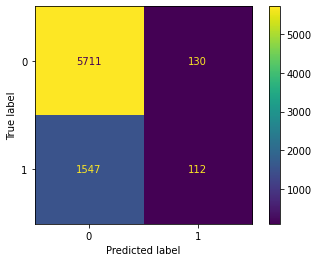

In [9]:
y_pred = KNN[iofmax].predict(x_test)

print("--------------------------------")
print('K = {}'.format(iofmax + 1))
print(classification_report(y_test,y_pred))
print("\nAccuracy: %.2f" %(accuracy_score(y_test, y_pred)*100))
print("Mean Squared Error: %.2f" %(mean_squared_error(y_test, y_pred)*100))
print("Explained Variance: %.2f" %(explained_variance_score(y_test, y_pred)*100))
print(plot_confusion_matrix(KNN[iofmax],x_test, y_test, values_format='d'))
print("--------------------------------")

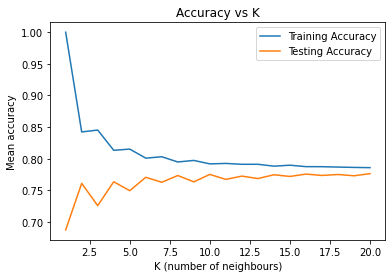

In [10]:
lst = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

fig = plt.figure()
ax = plt.axes()
plt.plot(lst, train_accuracyKNN, label = 'Training Accuracy')
plt.plot(lst, test_accuracyKNN, label = 'Testing Accuracy')
plt.xlabel('K (number of neighbours)')
plt.ylabel('Mean accuracy')
plt.title('Accuracy vs K')
plt.legend()
plt.savefig('Graph.png')
plt.show()